In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
sdge_final_data = pd.read_csv('data/merged_sdge_data.csv')
sdge_final_data

,Date,SDGE,Year,Month,Day,Week_day,Season,Holiday,Non_working,DailyCoolingDegreeDays,DailyHeatingDegreeDays,HourlyDryBulbTemperature
0,2019-01-01 00:00:00,48485.35539,2019,1,1,Tuesday,winter,1,non-working,0.0,12.0,52.344828
1,2019-01-02 00:00:00,56532.90157,2019,1,2,Wednesday,winter,0,working,0.0,13.0,52.068966
2,2019-01-03 00:00:00,57024.67562,2019,1,3,Thursday,winter,0,working,0.0,12.0,53.333333
3,2019-01-04 00:00:00,56456.88815,2019,1,4,Friday,winter,0,working,0.0,12.0,53.551724
4,2019-01-05 00:00:00,55838.51372,2019,1,5,Saturday,winter,0,non-working,0.0,9.0,55.793103
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2022-04-26 00:00:00,46399.54296,2022,4,26,Tuesday,winter,0,working,0.0,2.0,62.656250
1212,2022-04-27 00:00:00,44594.50561,2022,4,27,Wednesday,winter,0,working,0.0,4.0,60.272727
1213,2022-04-28 00:00:00,46513.39192,2022,4,28,Thursday,winter,0,working,0.0,4.0,60.088235
1214,2022-04-29 00:00:00,43917.67549,2022,4,29,Friday,winter,0,working,0.0,4.0,60.896552


<AxesSubplot:xlabel='Date'>

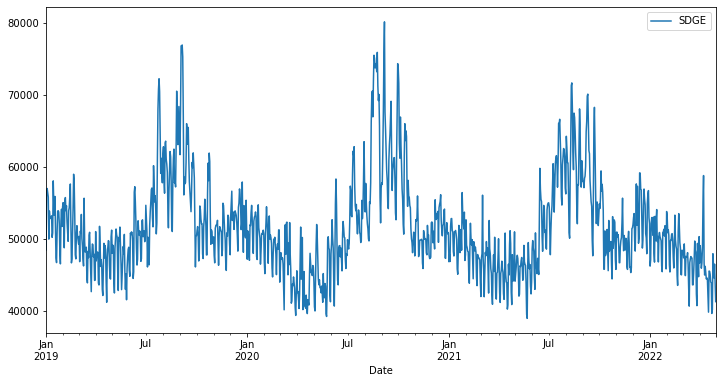

In [3]:
sdge_final_data["Date"] = pd.to_datetime(sdge_final_data["Date"])
df=sdge_final_data[["Date","SDGE"]]
df.set_index('Date', inplace=True)
df.plot(figsize=(12,6))

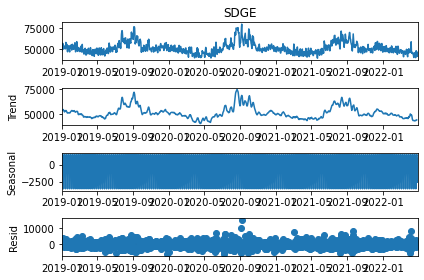

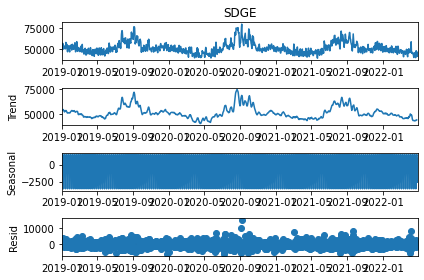

In [5]:
results = seasonal_decompose(df['SDGE'])
results.plot()

In [6]:
len(df)

1216

In [7]:
train = df.iloc[:1000]
test = df.iloc[1000:]

In [8]:
scaler = MinMaxScaler()

In [9]:
df.head(),df.tail()

(                   SDGE
 Date                   
 2019-01-01  48485.35539
 2019-01-02  56532.90157
 2019-01-03  57024.67562
 2019-01-04  56456.88815
 2019-01-05  55838.51372,
                    SDGE
 Date                   
 2022-04-26  46399.54296
 2022-04-27  44594.50561
 2022-04-28  46513.39192
 2022-04-29  43917.67549
 2022-04-30  41303.16007)

In [10]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [11]:
scaled_train[:10]

array([[0.23073194],
       [0.42601185],
       [0.43794513],
       [0.42416733],
       [0.40916199],
       [0.2674151 ],
       [0.36220859],
       [0.34134972],
       [0.34019228],
       [0.33631085]])

In [12]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [13]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.23073194 0.42601185 0.43794513]
Predict this y: 
 [[0.42416733]]


In [14]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [17]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [19]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
988/988 [==============================] - 4s 3ms/step - loss: 0.0133
Epoch 2/50
988/988 [==============================] - 15s 15ms/step - loss: 0.0092 0s 
Epoch 3/50
988/988 [==============================] - 16s 16ms/step - loss: 0.0075
Epoch 4/50
988/988 [==============================] - 13s 14ms/step - loss: 0.0067
Epoch 5/50
988/988 [==============================] - 14s 14ms/step - loss: 0.0059
Epoch 6/50
988/988 [==============================] - 13s 13ms/step - loss: 0.0059
Epoch 7/50
988/988 [==============================] - 14s 14ms/step - loss: 0.0057
Epoch 8/50
988/988 [==============================] - 12s 12ms/step - loss: 0.0055
Epoch 9/50
988/988 [==============================] - 12s 12ms/step - loss: 0.0054
Epoch 10/50
988/988 [==============================] - 13s 13ms/step - loss: 0.0053
Epoch 11/50
988/988 [==============================] - 13s 13ms/step - loss: 0.0052
Epoch 12/50
988/988 [==============================] - 13s 13ms/step - loss: 0.0050

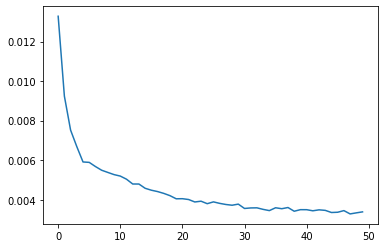

In [20]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [21]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

array([[0.439084]], dtype=float32)

In [22]:
scaled_test[0]

array([0.39253281])

In [23]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [24]:
test_predictions

[array([0.439084], dtype=float32),
 array([0.4363499], dtype=float32),
 array([0.440886], dtype=float32),
 array([0.4488382], dtype=float32),
 array([0.42410547], dtype=float32),
 array([0.36549732], dtype=float32),
 array([0.33008164], dtype=float32),
 array([0.43950066], dtype=float32),
 array([0.5047707], dtype=float32),
 array([0.5275748], dtype=float32),
 array([0.5270549], dtype=float32),
 array([0.49062487], dtype=float32),
 array([0.4127308], dtype=float32),
 array([0.3791808], dtype=float32),
 array([0.46206886], dtype=float32),
 array([0.470556], dtype=float32),
 array([0.46948805], dtype=float32),
 array([0.46343112], dtype=float32),
 array([0.43689513], dtype=float32),
 array([0.39338943], dtype=float32),
 array([0.37739208], dtype=float32),
 array([0.44833356], dtype=float32),
 array([0.4936069], dtype=float32),
 array([0.5090513], dtype=float32),
 array([0.5060927], dtype=float32),
 array([0.4830811], dtype=float32),
 array([0.43677914], dtype=float32),
 array([0.4213593]

In [25]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

<ipython-input-25-df68ac2ffec1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='Date'>

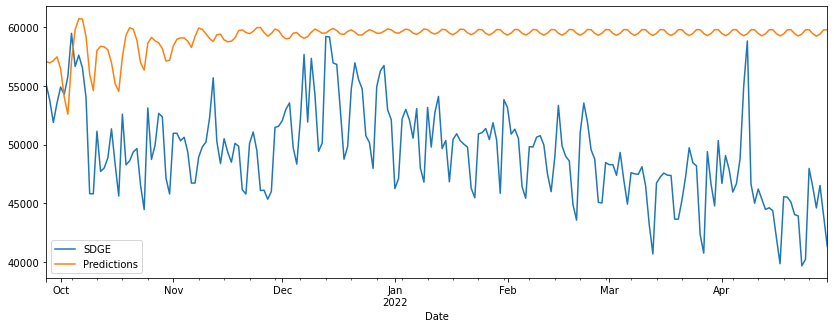

In [26]:
test.plot(figsize=(14,5))